# Data Analysis

<br>

__Technical Notebook -__  Module 1 Microsoft Project <br />
__Data Scientists -__  Nathan Venos, Max Tingle <br />
__Flatiron School -__ DC Data Science Fellowship

<br>


In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [208]:
# creating a column of our new popularity/engagement metric which multiplies average_rating by num_votes
df['rating_votes'] = df['average_rating'] * df['num_votes']

In [209]:
# calculating each movie's profit
df['profit'] = df['worldwide_gross'] - df['production_budget']

In [210]:
# LIKELY TO DELETE OR APPEND AS ADDITIONAL ANALYSIS

# df['action_or_adven_and_anime'] = (df['action'] & df['animation']) | (df['adventure'] & df['animation'])

80


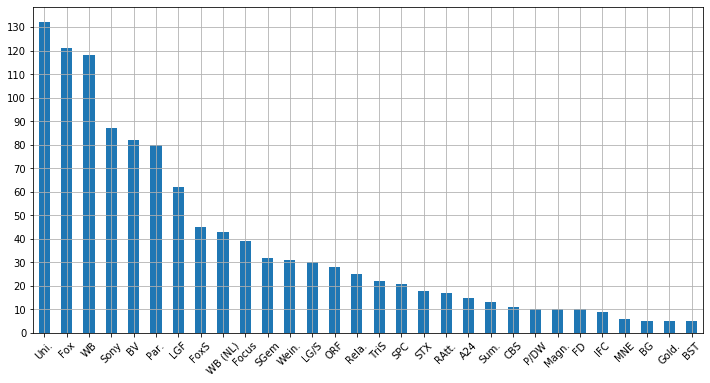

In [211]:
# Analyzing the studios and how many films they have in our dataset, so we can focus those with sufficient data.
print(len(df.studio.unique()))
ax = df.studio.value_counts().head(30).plot.bar(figsize=(12, 6))
ax.grid()
ax.yaxis.set_ticks(np.arange(0, 140, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

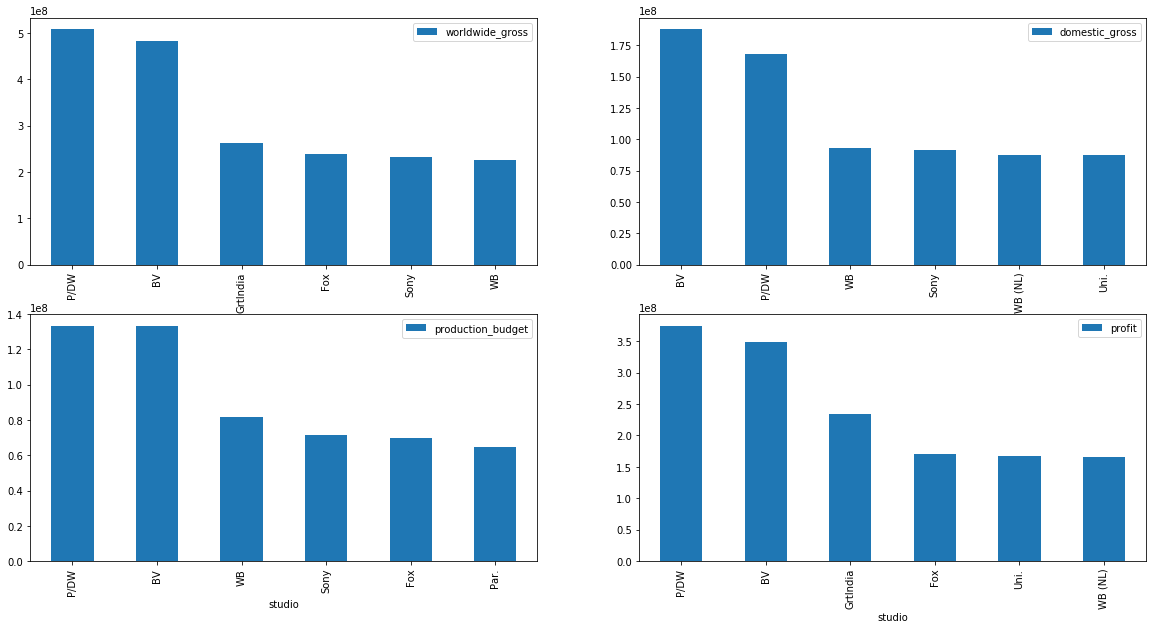

In [212]:
# Plotting a series of financial metrics
# P/DW and BV are clearly the best performing
# WB and Fox also appear in the top 6 in worldwide_gross, profit and rating*votes, 
# which were our primary metrics for success.
# Those 4 were selected for deeper analysis as our core 4 studios.
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(221)
df[['worldwide_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['worldwide_gross'], ascending=False).head(6).plot.bar(ax=ax1)

ax2 = plt.subplot(222)
df[['domestic_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['domestic_gross'], ascending=False).head(6).plot.bar(ax=ax2)

ax3 = plt.subplot(223)
df[['production_budget', 'studio']].groupby(['studio']).mean().sort_values(
    by=['production_budget'], ascending=False).head(6).plot.bar(ax=ax3)

ax4 = plt.subplot(224)
df[['profit', 'studio']].groupby(['studio']).mean().sort_values(
    by=['profit'], ascending=False).head(6).plot.bar(ax=ax4)

plt.subplots_adjust(wspace=0.2)

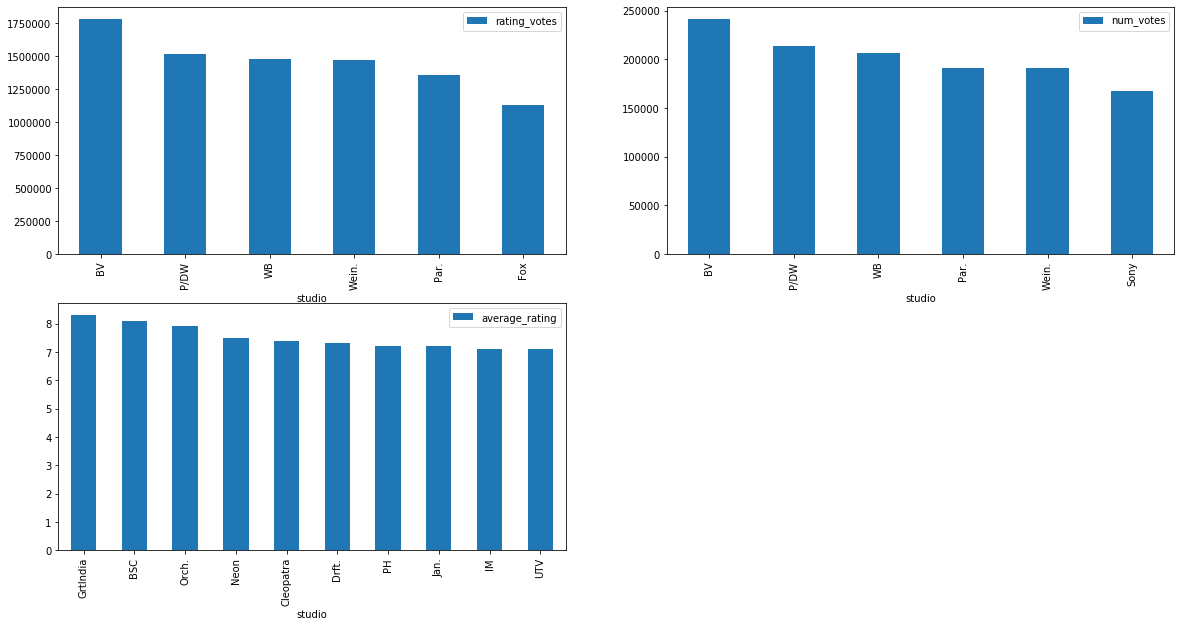

In [213]:
# Plotting a series of engagement metrics.
# highest average rating alone introduces many small studios, 
# which we don't think are as informative/applicable to Microsoft,
# so we're focusing on rating_votes.
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(221)
df[['rating_votes', 'studio']].groupby(['studio']).mean().sort_values(
    by=['rating_votes'], ascending=False).head(6).plot.bar(ax=ax1)

ax2 = plt.subplot(222)
df[['num_votes', 'studio']].groupby(['studio']).mean().sort_values(
    by=['num_votes'], ascending=False).head(6).plot.bar(ax=ax2)

ax3 = plt.subplot(223)
df[['average_rating', 'studio']].groupby(['studio']).mean().sort_values(
    by=['average_rating'], ascending=False).head(10).plot.bar(ax=ax3)

plt.subplots_adjust(wspace=0.2)

In [214]:
# Creating a Dataframe for our Core 4 Studios
core_4_studios = ['P/DW','BV','Fox','WB']
core_4_studios_df = df.loc[df.studio.isin(core_4_studios)]

In [215]:
# We explored all of the DataFrame subsets for each of the core 4 studios

# top_studios_df.loc[top_studios_df.studio == 'BV'].sort_values(
#     by='worldwide_gross', ascending=False)

# top_studios_df.loc[top_studios_df.studio ==
#                    'P/DW'].sort_values(by='worldwide_gross', ascending=False)

# top_studios_df.loc[top_studios_df.studio == 'WB'].sort_values(
#     by='worldwide_gross', ascending=False)

# top_studios_df.loc[top_studios_df.studio == 'Fox'].sort_values(
#     by='worldwide_gross', ascending=False)

In [216]:
# exploring animation and action genre of our top/core 4 studios
df.animation.value_counts()

False    1133
True       93
Name: animation, dtype: int64

In [217]:
# Creating a function that produces stats for each core studio's films for a given genre
def pct_of_core_studios_movies_in_genre(genre):
    pct_dict = {}
    print(genre)
    for core_studio in set(core_4_studios_df.studio):
        studio_genre_cts = core_4_studios_df[genre].loc[core_4_studios_df.studio == core_studio].value_counts()
        studio_genre_pct = round(100*studio_genre_cts[True]/(studio_genre_cts[True]+studio_genre_cts[False]), 2)
        pct_dict.update({core_studio: studio_genre_pct})
        print(core_studio+": "+str(studio_genre_pct)+"%")
    print(pd.DataFrame.from_dict(pct_dict, orient='index').describe())

In [218]:
# Reviewing statistics for select genres. 
# Animation is more prevalent in the best performing studios,
# and while all 4 have plenty of action and adventure movies, which are good performers,
# animation is where there is the most divergence towards the top 2 studios (BV & P/DW)
# as evidenced by the standard deviations.
pct_of_core_studios_movies_in_genre('animation')
print('')
pct_of_core_studios_movies_in_genre('action')
print('')
pct_of_core_studios_movies_in_genre('adventure')

animation
BV: 24.39%
Fox: 16.53%
P/DW: 70.0%
WB: 7.63%
               0
count   4.000000
mean   29.637500
std    27.765712
min     7.630000
25%    14.305000
50%    20.460000
75%    35.792500
max    70.000000

action
BV: 36.59%
Fox: 35.54%
P/DW: 60.0%
WB: 44.92%
               0
count   4.000000
mean   44.262500
std    11.299712
min    35.540000
25%    36.327500
50%    40.755000
75%    48.690000
max    60.000000

adventure
BV: 65.85%
Fox: 43.8%
P/DW: 70.0%
WB: 33.05%
               0
count   4.000000
mean   53.175000
std    17.669583
min    33.050000
25%    41.112500
50%    54.825000
75%    66.887500
max    70.000000


In [219]:
# Creating DataFrames for a stacked bar plot of the top 6 studios by Worldwide Revenue
# with Budget and Profit
top_6_ww_gross_studios = list(df[['worldwide_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['worldwide_gross'], ascending=False).head(6).index)

top_6_ww_gross_studios_df = df.loc[df.studio.isin(top_6_ww_gross_studios)]

df_top_budget = top_6_ww_gross_studios_df[['production_budget', 'studio']].groupby(['studio']).mean()

df_top_profit = top_6_ww_gross_studios_df[['profit', 'studio']].groupby(['studio']).mean()

top_6_studios_graph = top_6_ww_gross_studios_df[['worldwide_gross', 'studio']].groupby(['studio']).mean().sort_values(
    by=['worldwide_gross'], ascending=False)

top_6_studios_graph = top_6_studios_graph.join(df_top_budget, how='left')
top_6_studios_graph = top_6_studios_graph.join(df_top_profit, how='left')

top_6_studios_graph.reset_index(inplace=True)

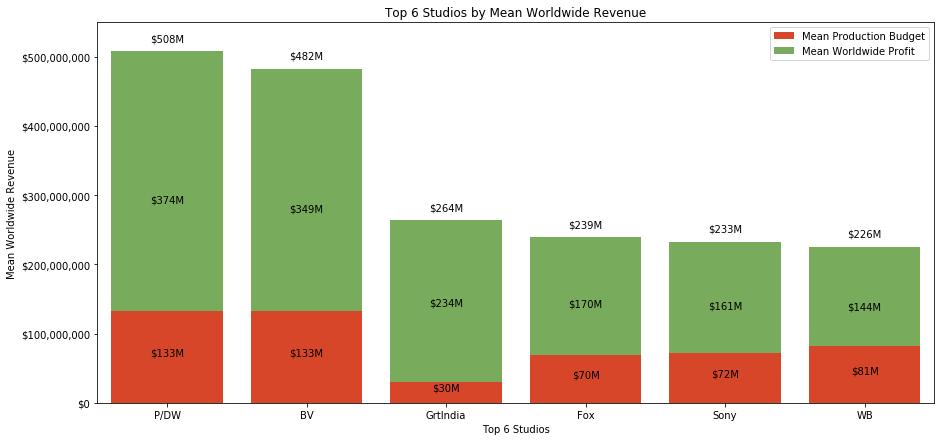

In [220]:
# Creating stacked barplot
fig = plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=top_6_studios_graph,
                         x='studio',
                         y='production_budget',
                         color=sns.xkcd_rgb["vermillion"],
                         label='Mean Production Budget')

profit_bar = sns.barplot(data=top_6_studios_graph,
                         x='studio',
                         y='profit',
                         bottom=top_6_studios_graph['production_budget'],
                         color=sns.xkcd_rgb["turtle green"],
                         label='Mean Worldwide Profit')

budget_bar.set(xlabel='Top 6 Studios',
               ylabel='Mean Worldwide Revenue',
               title='Top 6 Studios by Mean Worldwide Revenue',
               ylim=(0, 550000000))
budget_bar.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

for bar in budget_bar.patches:
    budget_bar.annotate('$'+format(bar.get_height()/1000000, ',.0f')+'M',
                        (bar.get_x() + bar.get_width() / 2.,
                         (bar.get_height()-25000000 + bar.get_y()*1.5)/2),
                        ha='center',
                        xytext=(0, 10),
                        textcoords='offset points')
    if bar.get_y() > 0:
        budget_bar.annotate('$'+format((bar.get_height() + bar.get_y())/1000000, ',.0f')+'M',
                            (bar.get_x() + bar.get_width() / 2.,
                             bar.get_height() + bar.get_y()),
                            ha='center',
                            xytext=(0, 10),
                            textcoords='offset points')

plt.legend()
plt.show()
fig.savefig('Figures/Top_6_Studios_by_Mean_Worldwide_Revenue.png')

In [221]:
# Creating DataFrame for plotting the top 6 studios by the product of average_rating and num_votes
top_6_rating_studios = df[['rating_votes', 'studio']].groupby(['studio']).mean().sort_values(
    by=['rating_votes'], ascending=False).head(6)
top_6_rating_studios.reset_index(inplace=True)

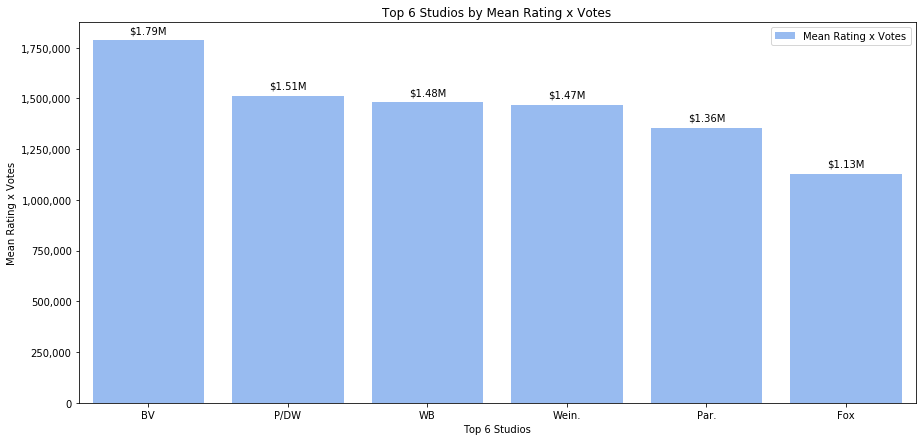

In [222]:
fig = plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=top_6_rating_studios,
                         x='studio',
                         y='rating_votes',
                         color=sns.xkcd_rgb["carolina blue"],
                         label='Mean Rating x Votes')

budget_bar.set(xlabel='Top 6 Studios',
              ylabel='Mean Rating x Votes',
              title='Top 6 Studios by Mean Rating x Votes')
budget_bar.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for bar in budget_bar.patches:
    budget_bar.annotate('$'+format(bar.get_height()/1000000, ',.2f')+'M',
                        (bar.get_x() + bar.get_width() / 2.,
                         bar.get_height()),
                        ha='center',
                        xytext=(0, 7),
                        textcoords='offset points')

plt.legend()
plt.show()
fig.savefig('Figures/Top_6_Studios_by_Mean_Rating_x_Votes.png')

In [223]:
# Creating DataFrame for core studios based on count of all movies, animation movies, and not-animation movies
core_studios_anime_df_tot = core_4_studios_df[['studio', 'animation']].groupby(
    ['studio']).count()
core_studios_anime_df_tot.rename({'animation': 'total'}, axis=1, inplace=True)

core_studios_anime_df_tru = core_4_studios_df[['studio', 'animation']].loc[core_4_studios_df['animation'] == True].groupby(
    ['studio']).count()
core_studios_anime_df_tru.rename({'animation': 'true'}, axis=1, inplace=True)

core_studios_anime_df_fls = core_4_studios_df[['studio', 'animation']].loc[core_4_studios_df['animation']== False].groupby(
    ['studio']).count()
core_studios_anime_df_fls.rename({'animation': 'false'}, axis=1, inplace=True)

core_tot_tru_df = core_studios_anime_df_tot.join(core_studios_anime_df_tru, how='left')
core_studios_anime_df = core_tot_tru_df.join(core_studios_anime_df_fls, how='left')

core_studios_anime_df.reset_index(inplace=True)

In [224]:
# Converting count of Animation and Not-Animation to percentages
core_studios_anime_df.true = 100 * core_studios_anime_df.true / core_studios_anime_df.total
core_studios_anime_df.false = 100 * core_studios_anime_df.false / core_studios_anime_df.total

# Sorting them by % of Animation
core_studios_anime_df.sort_values(by='true', ascending=False, inplace=True)

# Moving studio names from index to column
core_studios_anime_df.reset_index(inplace=True, drop=True)

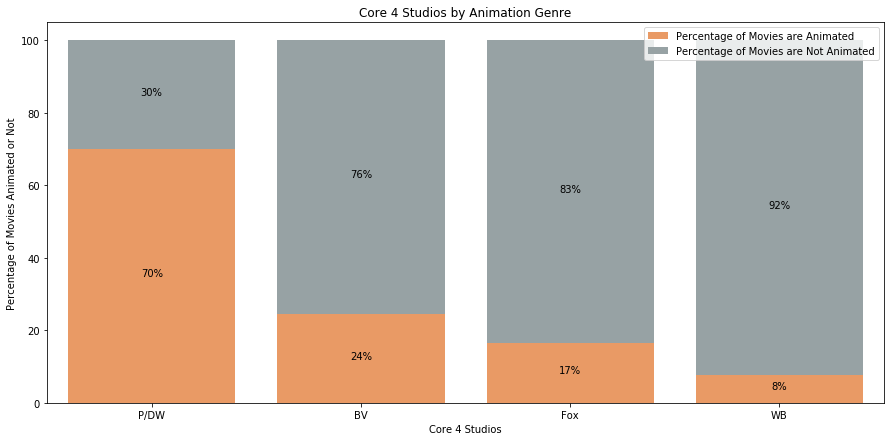

In [225]:
fig = plt.figure(figsize=(15, 7))

true_bar = sns.barplot(data=core_studios_anime_df,
                       x='studio',
                       y='true',
                       color=sns.xkcd_rgb["pastel orange"],
                       label='Percentage of Movies are Animated')

false_bar = sns.barplot(data=core_studios_anime_df,
                        x='studio',
                        y='false',
                        bottom=core_studios_anime_df['true'],
                        color=sns.xkcd_rgb["cool grey"],
                        label='Percentage of Movies are Not Animated')

true_bar.set(xlabel='Core 4 Studios',
             ylabel='Percentage of Movies Animated or Not',
             title='Core 4 Studios by Animation Genre')

for bar in true_bar.patches:
    true_bar.annotate(format(bar.get_height(), ',.0f')+'%',
                      (bar.get_x() + bar.get_width() / 2.,
                       bar.get_height()/2 + bar.get_y()),
                      ha='center',
                      xytext=(0, 0),
                      textcoords='offset points')

plt.legend()
plt.show()
fig.savefig('Figures/Core_4_Studios_by_Animation_Genre.png')

In [226]:
# Creating DataFrames for a stacked bar plot of all movies of Genre Animation vs. Not-Animation
# with Budget and Profit
df_anime_budget = df[['production_budget', 'animation']].groupby(['animation']).mean()

df_anime_profit = df[['profit', 'animation']].groupby(['animation']).mean()

df_anime_graph = df[['worldwide_gross', 'animation']].groupby(['animation']).mean().sort_values(
    by=['worldwide_gross'], ascending=False)

df_anime_graph = df_anime_graph.join(df_anime_budget, how='left')
df_anime_graph = df_anime_graph.join(df_anime_profit, how='left')

df_anime_graph.reset_index(inplace=True)

# False and True weren't being properly handled by the plotting function as booleans
# False budget and True profit were combined and vice versa
df_anime_graph.animation = df_anime_graph.animation.astype(str)

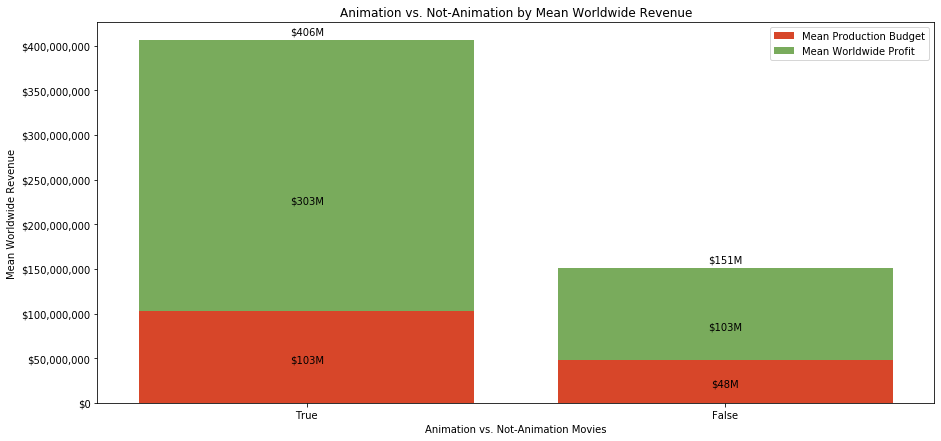

In [227]:
fig = plt.figure(figsize=(15, 7))

anime_budget_bar = sns.barplot(x=df_anime_graph['animation'],
                               y=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["vermillion"],
                               label='Mean Production Budget')

anime_profit_bar = sns.barplot(x=df_anime_graph['animation'],
                               y=df_anime_graph['profit'],
                               bottom=df_anime_graph['production_budget'],
                               color=sns.xkcd_rgb["turtle green"],
                               label='Mean Worldwide Profit')

anime_budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
                     ylabel='Mean Worldwide Revenue',
                     title='Animation vs. Not-Animation by Mean Worldwide Revenue')
anime_budget_bar.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}'))

for bar in anime_budget_bar.patches:
    anime_budget_bar.annotate('$'+format(bar.get_height()/1000000, ',.0f')+'M',
                              (bar.get_x() + bar.get_width() / 2.,
                               (bar.get_height()-25000000 + bar.get_y()*1.5)/2),
                              ha='center',
                              xytext=(0, 6),
                              textcoords='offset points')
    if bar.get_y() > 0:
        anime_budget_bar.annotate('$'+format((bar.get_height() + bar.get_y())/1000000, ',.0f')+'M',
                                  (bar.get_x() + bar.get_width() / 2.,
                                   bar.get_height() + bar.get_y()),
                                  ha='center',
                                  xytext=(0, 6),
                                  textcoords='offset points')

plt.legend()
plt.show()
fig.savefig('Figures/Animation_vs_Not-Animation_by_Mean_Worldwide_Revenue.png')

In [228]:
# Creating DataFrame for plotting the Animation vs. Not-Animation by the product of average_rating and num_votes
anime_rating = df[['rating_votes', 'animation']].groupby(['animation']).median().sort_values(
    by=['rating_votes'], ascending=False)
anime_rating.reset_index(inplace=True)

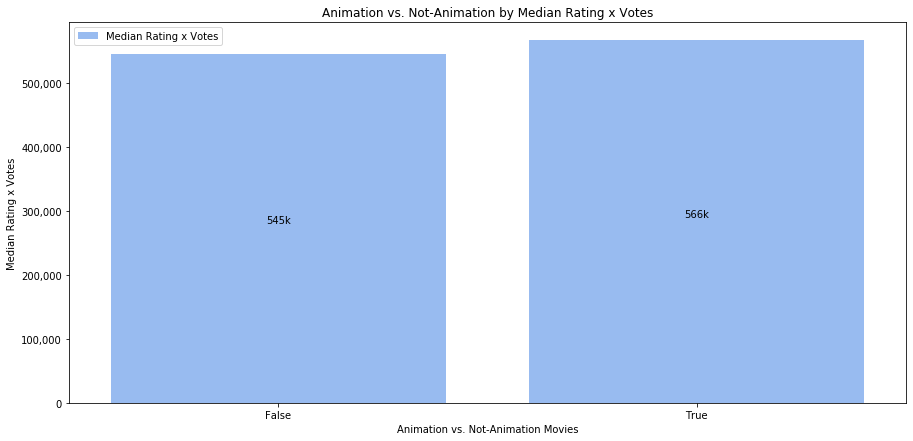

In [229]:
fig = plt.figure(figsize=(15, 7))

budget_bar = sns.barplot(data=anime_rating,
                         x='animation',
                         y='rating_votes',
                         color=sns.xkcd_rgb["carolina blue"],
                         label='Median Rating x Votes')

budget_bar.set(xlabel='Animation vs. Not-Animation Movies',
               ylabel='Median Rating x Votes',
               title='Animation vs. Not-Animation by Median Rating x Votes')
budget_bar.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

for bar in budget_bar.patches:
    budget_bar.annotate(format(bar.get_height()/1000, ',.0f')+'k',
                        (bar.get_x() + bar.get_width() / 2.,
                         bar.get_height() / 2),
                        ha='center',
                        xytext=(0, 5),
                        textcoords='offset points')
plt.legend()
plt.show()
fig.savefig('Figures/Animation_vs_Not-Animation_by_Mean_Rating_x_Votes.png')